In [1]:
import sys
sys.path.append('../30_data_tools/')

import cv2
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from helper import load_dotenv

In [2]:
dotenv = load_dotenv()

In [3]:
attachment_dir = dotenv['ATTACHMENT_DIR'] / 'sobel_operator'

In [13]:
img = cv2.imread( str(attachment_dir / 'sobel_example_img.jpg') )

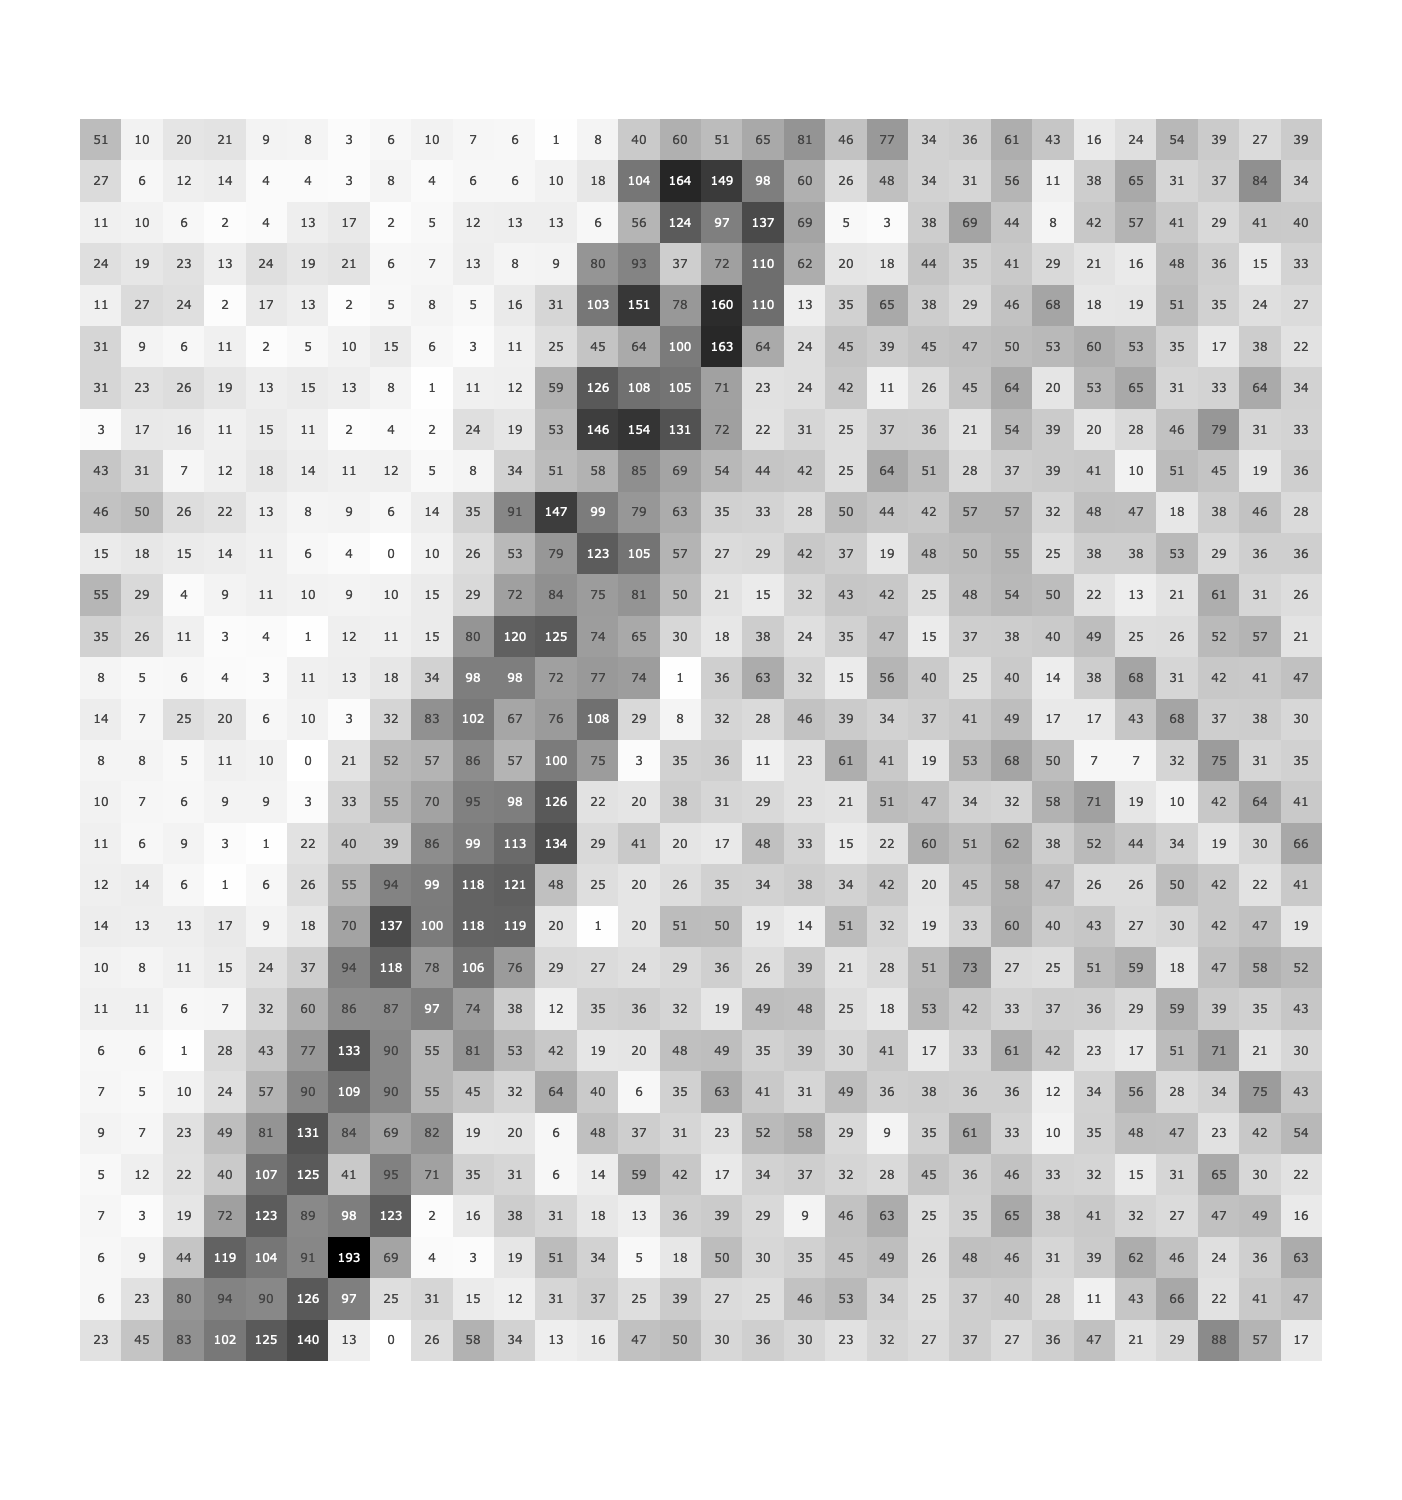

In [14]:
fig_sobel_input = px.imshow(
    img[:,:,0],
    text_auto=True,
    color_continuous_scale=['white','black'],
    width=1500,
    height=1500
)
fig_sobel_input.update_layout(coloraxis_showscale=False)
fig_sobel_input.update_xaxes(showticklabels=False)
fig_sobel_input.update_yaxes(showticklabels=False)

fig_sobel_input.write_image( attachment_dir / 'sobel_input.jpg' )

fig_sobel_input

In [15]:
sobel_operator = np.array([
    [0.1, 0.1,0.1],
    [0.1, 0.2, 0.1],
    [0.1, 0.1, 0.1],
])

In [20]:
fig = px.imshow(
    [
        [0.1, 0.1,0.1],
        [0.1, 0.2, 0.1],
        [0.1, 0.1, 0.1],
    ],
    text_auto=True,
    color_continuous_scale=['white','black'],
    zmin=0,
    zmax=0.5,
)
fig.update_layout(coloraxis_showscale=False)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

image_bytes = pio.to_image(fig, format='png', engine='kaleido')

with ( attachment_dir / 'sobel_operator.png' ).open('wb') as f:
    f.write(image_bytes)

In [17]:
filtered = cv2.filter2D(src=img, ddepth=-1, kernel=sobel_operator)
fig = px.imshow(
    filtered[:,:,0],
    text_auto=True,
    color_continuous_scale=['white','black'],
    width=1500,
    height=1500
)
fig.update_layout(coloraxis_showscale=False)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)

fig.write_image( attachment_dir / 'result.jpg' )